In [1]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.c_[X, Y], columns=["x", "y"])

In [3]:
import statsmodels.api as sm
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()
result.params

Intercept   -27.358463
x             0.879627
dtype: float64

In [4]:
model2 = sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) -1 ", data=df)
# 포뮬라 에러나면 patsy 패키지 업데이트 conda update patsy

In [5]:
result2 = model2.fit()
result2.params

x            1.005637
I(x ** 2)   -0.013981
I(x ** 3)    0.000082
dtype: float64

In [6]:
a,b,c = result2.params

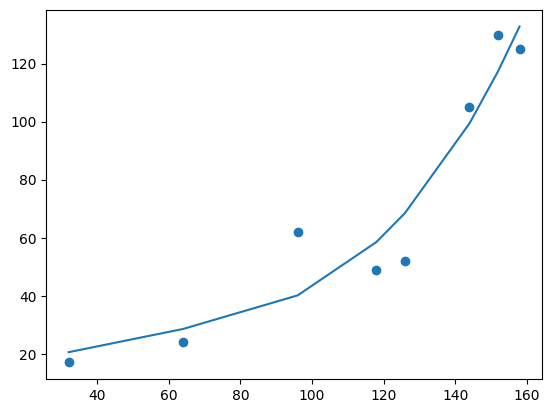

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X, a*np.array(X) + 
            b*np.power(np.array(X),2) + 
            c*np.power(np.array(X),3), '-')
plt.show()

In [8]:
x_df = pd.DataFrame(data=X, columns=['x'])

In [9]:
y_ = result2.predict(x_df)

In [10]:
y_

0     20.546081
1     28.554576
2     40.121998
3     58.503665
4     68.513031
5     99.357248
6    117.343957
7    132.781779
dtype: float64

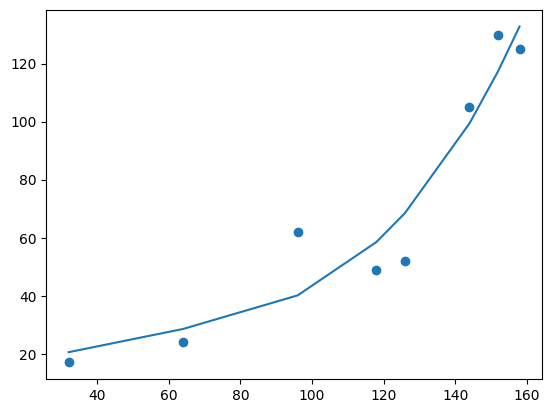

In [11]:
plt.scatter(X, Y)
plt.plot(X, y_, '-')
plt.show()

In [12]:
model4 = sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) -1 ", data=df)
# 포뮬라 에러나면 patsy 패키지 업데이트 conda update patsy

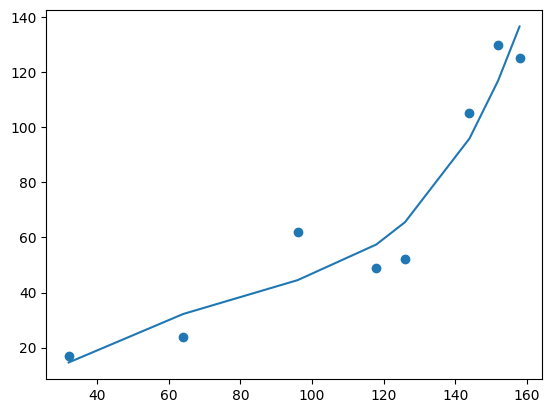

In [13]:
result4 = model4.fit()
y_ = result4.predict(x_df)
plt.scatter(X, Y)
plt.plot(X, y_, '-')
plt.show()